In [2]:
!pip install pysimplegui

C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_20464\835644445.py:247: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(year,rotation = 90,fontsize = 6.5)
C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_20464\835644445.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(author,rotation = 90,fontsize = 6.5)


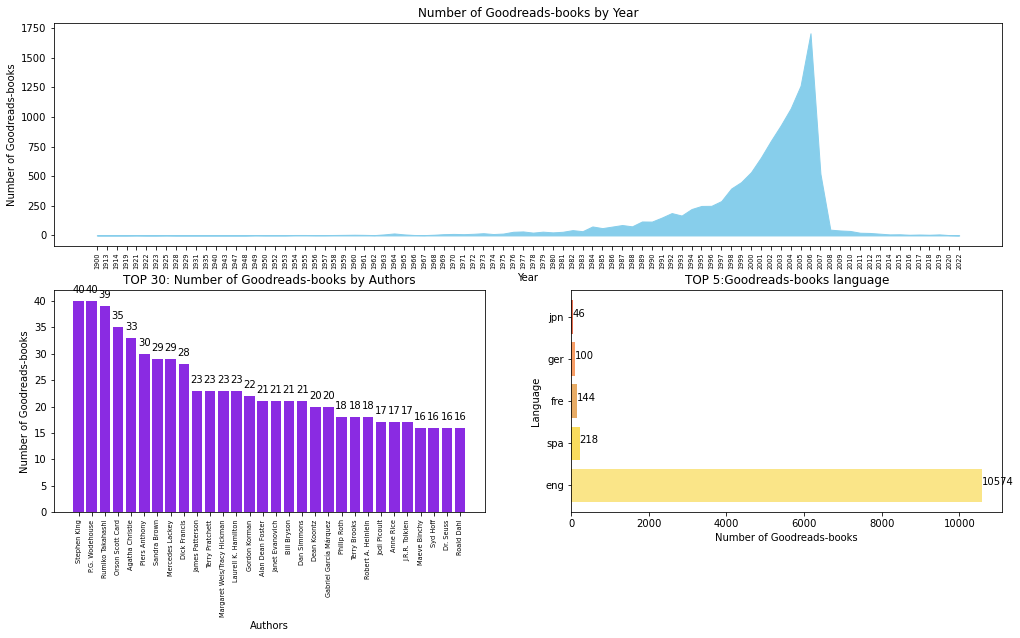

In [2]:
import PySimpleGUI as sg
import pymongo
import json 
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


client = pymongo.MongoClient("mongodb://localhost:27017/")
database = client["admin"]
collection = database["Quiz"]

sg.theme('DarkAmber')
layout = [
                [sg.pin(sg.Text('\n\nGoodreads-books', font=("Arial", 14),key = '_START_'))],
                [sg.Text()],
                [sg.pin(sg.Button('INSERT', key = '_INSERT_', visible=True)),
                 sg.pin(sg.Button('RETREIVE', key = '_RETREIVE_', visible=True)),
                 sg.pin(sg.Button('UPDATE', key = '_UPDATE_', visible=True)),                 
                 sg.pin(sg.Button('DELETE', key = '_DELETE_', visible=True))],
                [sg.pin(sg.Button('VISUALIZATION', button_color='black on white',key = '_VIS_', visible=True))],
                 [sg.pin(sg.Cancel('EXIT', button_color='white on red',key = '_EXIT_'))],
                        
            ]


headers = {'title':[], 'authors':[], 'average_rating':[],'language_code':[],'num_pages':[],'ratings_count':[],
          'text_reviews_count':[],'publication_date':[],'publisher':[]}
table = pd.DataFrame(headers)
headings = list(headers)
value = table.values.tolist()

lan = ['aar-Afar', 'abk-Abkhazian', 'afr-Afrikaans', 'aka-Akan',
       'alb-Albanian', 'amh-Amharic', 'ara-Arabic', 'arg-Aragonese',
       'arm-Armenian', 'asm-Assamese', 'ava-Avaric', 'ave-Avestan',
       'aym-Aymara', 'aze-Azerbaijani', 'bak-Bashkir', 'bam-Bambara',
       'baq-Basque', 'bel-Belarusian', 'ben-Bengali',
       'bih-Bihari languages', 'bis-Bislama', 'bos-Bosnian', 'bre-Breton',
       'bul-Bulgarian', 'bur-Burmese', 'cat-Catalan; Valencian',
       'cha-Chamorro', 'che-Chechen', 'chi-Chinese',
       'chu-Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic',
       'chv-Chuvash', 'cor-Cornish', 'cos-Corsican', 'cre-Cree',
       'cze-Czech', 'dan-Danish', 'div-Divehi; Dhivehi; Maldivian',
       'dut-Dutch; Flemish', 'dzo-Dzongkha', 'eng-English',
       'epo-Esperanto', 'est-Estonian', 'ewe-Ewe', 'fao-Faroese',
       'fij-Fijian', 'fin-Finnish', 'fre-French', 'fry-Western Frisian',
       'ful-Fulah', 'geo-Georgian', 'ger-German',
       'gla-Gaelic; Scottish Gaelic', 'gle-Irish', 'glg-Galician',
       'glv-Manx', 'gre-Greek, Modern (1453-)', 'grn-Guarani',
       'guj-Gujarati', 'hat-Haitian; Haitian Creole', 'hau-Hausa',
       'heb-Hebrew', 'her-Herero', 'hin-Hindi', 'hmo-Hiri Motu',
       'hrv-Croatian', 'hun-Hungarian', 'ibo-Igbo', 'ice-Icelandic',
       'ido-Ido', 'iii-Sichuan Yi; Nuosu', 'iku-Inuktitut',
       'ile-Interlingue; Occidental',
       'ina-Interlingua (International Auxiliary Language Association)',
       'ind-Indonesian', 'ipk-Inupiaq', 'ita-Italian', 'jav-Javanese',
       'jpn-Japanese', 'kal-Kalaallisut; Greenlandic', 'kan-Kannada',
       'kas-Kashmiri', 'kau-Kanuri', 'kaz-Kazakh', 'khm-Central Khmer',
       'kik-Kikuyu; Gikuyu', 'kin-Kinyarwanda', 'kir-Kirghiz; Kyrgyz',
       'kom-Komi', 'kon-Kongo', 'kor-Korean', 'kua-Kuanyama; Kwanyama',
       'kur-Kurdish', 'lao-Lao', 'lat-Latin', 'lav-Latvian',
       'lim-Limburgan; Limburger; Limburgish', 'lin-Lingala',
       'lit-Lithuanian', 'ltz-Luxembourgish; Letzeburgesch',
       'lub-Luba-Katanga', 'lug-Ganda', 'mac-Macedonian',
       'mah-Marshallese', 'mal-Malayalam', 'mao-Maori', 'mar-Marathi',
       'may-Malay', 'mlg-Malagasy', 'mlt-Maltese', 'mon-Mongolian',
       'nau-Nauru', 'nav-Navajo; Navaho',
       'nbl-Ndebele, South; South Ndebele',
       'nde-Ndebele, North; North Ndebele', 'ndo-Ndonga', 'nep-Nepali',
       'nno-Norwegian Nynorsk; Nynorsk, Norwegian',
       'nob-Bokmål, Norwegian; Norwegian Bokmål', 'nor-Norwegian',
       'nya-Chichewa; Chewa; Nyanja', 'oci-Occitan (post 1500)',
       'oji-Ojibwa', 'ori-Oriya', 'orm-Oromo', 'oss-Ossetian; Ossetic',
       'pan-Panjabi; Punjabi', 'per-Persian', 'pli-Pali', 'pol-Polish',
       'por-Portuguese', 'pus-Pushto; Pashto', 'que-Quechua',
       'roh-Romansh', 'rum-Romanian; Moldavian; Moldovan', 'run-Rundi',
       'rus-Russian', 'sag-Sango', 'san-Sanskrit',
       'sin-Sinhala; Sinhalese', 'slo-Slovak', 'slv-Slovenian',
       'sme-Northern Sami', 'smo-Samoan', 'sna-Shona', 'snd-Sindhi',
       'som-Somali', 'sot-Sotho, Southern', 'spa-Spanish; Castilian',
       'srd-Sardinian', 'srp-Serbian', 'ssw-Swati', 'sun-Sundanese',
       'swa-Swahili', 'swe-Swedish', 'tah-Tahitian', 'tam-Tamil',
       'tat-Tatar', 'tel-Telugu', 'tgk-Tajik', 'tgl-Tagalog', 'tha-Thai',
       'tib-Tibetan', 'tir-Tigrinya', 'ton-Tonga (Tonga Islands)',
       'tsn-Tswana', 'tso-Tsonga', 'tuk-Turkmen', 'tur-Turkish',
       'twi-Twi', 'uig-Uighur; Uyghur', 'ukr-Ukrainian', 'urd-Urdu',
       'uzb-Uzbek', 'ven-Venda', 'vie-Vietnamese', 'vol-Volapük',
       'wel-Welsh', 'wln-Walloon', 'wol-Wolof', 'xho-Xhosa',
       'yid-Yiddish', 'yor-Yoruba', 'zha-Zhuang; Chuang', 'zul-Zulu']

layout2 = [
                [sg.Text('Title: ', key = '_NAME_'), 
                 sg.InputText(key='_IN1_', size=(61, 1))],
    
                [sg.Text('Author: ', key = '_WRITER_'), 
                 sg.InputText(key='_IN2_', size=(58, 1))],
    
                [sg.Text('Average rating: ', key = '_RATE_'), 
                 sg.InputText(key='_IN3_', size=(59, 1))], 
                
                [sg.Text('Language code', key = '_LAN_'),
                sg.Combo(lan,key='_IN4_', size=(28, 1))], 
    
                [sg.Text('Number of Pages: ', key = '_PAGES_'), 
                 sg.InputText(key='_IN5_', size=(50, 1))] ,
    
                [sg.Text('Total number of ratings: ', key = '_TOTAL_'), 
                 sg.InputText(key='_IN6_', size=(59, 1))],
    
                [sg.Text('Total number of reviews: ', key = '_REVIEW_'), 
                 sg.InputText(key='_IN7_', size=(59, 1))],
    
                [sg.Text('Publication date: ', key = '_DATE_')],
                [sg.InputText(key='_CAL_', size=(15, 1),do_not_clear=False),
                 sg.CalendarButton('Select date',target='_CAL_', pad=None,key='_CALEN_',format=('%m/%d/%Y'))],
    
                 [sg.Text('Publisher: ', key = '_PUB_'),
                 sg.InputText(key='_IN8_', size=(56, 1)),] ,
    
    
                [sg.pin(sg.Button('Add data', key = '_ADD_')),sg.Button('EXIT', button_color='white on red',key = '_EXIT2_')],
    
                [sg.Table(values = value, headings = headings,key = '_TAADD_',
                          auto_size_columns=False, col_widths= list(map(lambda x:len(x)+1, headings)))]
                ]

layout3 = [
            [sg.Text('Insert JSON file')],
    
            [sg.Text("Choose a file: "), 
             sg.Input(key='_JSON_',do_not_clear=True), 
             sg.FileBrowse(file_types=(("JSON Files", "*.json"),))],
    
            [sg.pin(sg.Button('Read', key = '_READ_')),sg.pin(sg.Button('Submit', key = '_SUBMIT_'))],
    
            [sg.Table(values = value, headings = headings,key = '_TAREAD_',
                          auto_size_columns=False, col_widths= list(map(lambda x:len(x)+1, headings)))],
            [sg.Button('EXIT', button_color='white on red',key = '_EXIT5_')]
    
          ]



layoutTab =[[sg.TabGroup([[sg.Tab('Insert data', layout2, key='_mykey_'), 
                           sg.Tab('Insert file', layout3)]], key='_group1_', tab_location='topleft')]]


layout4 = [
                [sg.Text('Title: ', key = '_NAME_'), 
                 sg.InputText(key='_RE1_', size=(55, 1),do_not_clear=False)],
    
                [sg.Text('Author: ', key = '_WRITER_'), 
                 sg.InputText(key='_RE2_', size=(55, 1),do_not_clear=False)],
    
                [sg.pin(sg.Button('SEARCH', key = '_SEARCH_')),sg.Button('EXIT', button_color='white on red',key = '_EXIT3_')],
                
                [sg.Table(values = value, headings = headings,key = '_TABLE_',
                          auto_size_columns=False, col_widths= list(map(lambda x:len(x)+1, headings)))]
    
                ]

first = [[sg.Text('Updated Tiltle')],
                [sg.Text('Title(old): ', key = '_NAME_'), 
                 sg.InputText(key='_UP1_', size=(55, 1),do_not_clear=False)],
         
                [sg.Text('Title(updated): ', key = '_NAME_'), 
                 sg.InputText(key='_UP2_', size=(55, 1),do_not_clear=False)],
         
                 [sg.pin(sg.Button('UPDATE', key = '_UPDATE1_'))]

        ]

second = [[sg.Text('Update Author')],
                [sg.Text('Author(old): ', key = '_NAME_'), 
                 sg.InputText(key='_UP3_', size=(55, 1),do_not_clear=False)],
    
                [sg.Text('Author(updated): ', key = '_WRITER_'), 
                 sg.InputText(key='_UP4_', size=(55, 1),do_not_clear=False)],
    
                [sg.pin(sg.Button('UPDATE', key = '_UPDATE2_'))]
         ]

layout5 = [
                [sg.Text('Title: ', key = '_NAME_'), 
                 sg.InputText(key='_UP5_', size=(55, 1),do_not_clear=False)],
    
                [sg.Text('Author: ', key = '_WRITER_'), 
                 sg.InputText(key='_UP6_', size=(55, 1),do_not_clear=False)],
    
                [sg.pin(sg.Button('SEARCH', key = '_SEARCH2_'))],
                
                [sg.Table(values = value, headings = headings,key = '_TABLE2_',
                          auto_size_columns=False, col_widths= list(map(lambda x:len(x)+1, headings)))],
    
                [sg.Column(first),
                    sg.VSeperator(),
                    sg.Column(second),],
                
                [sg.Button('EXIT', button_color='white on red',key = '_EXIT4_')]
    
                ]


layout6 = [
            [sg.Text('Title: ', key = '_NAME_'), 
            sg.InputText(key='_DE1_', size=(55, 1),do_not_clear=False)],
    
            [sg.Text('Author: ', key = '_WRITER_'), 
            sg.InputText(key='_DE2_', size=(55, 1),do_not_clear=False)],
    
            [sg.pin(sg.Button('SEARCH', key = '_SE3_'))],
    
            [sg.Table(values = value, headings = headings,key = '_TABLE4_',
                          auto_size_columns=False, col_widths= list(map(lambda x:len(x)+1, headings)),
                     select_mode=sg.TABLE_SELECT_MODE_EXTENDED)],
    
            [sg.Text('Title: ', key = '_NAME_'), 
            sg.InputText(key='_DE3_', size=(55, 1),do_not_clear=False),
            sg.pin(sg.Button('DELETE', key = '_DEL2_'))],
    
            [sg.Button('EXIT', button_color='white on red',key = '_EXIT5_')],
    
            ]

def insert_once(name,authors,ave,lang,page,cou,review,dat,pub):
    df_insert = {"title":name,
                 "authors":authors,
                 "average_rating":ave,
                 "language_code":lang,
                 "num_pages":page,
                 "ratings_count":cou,
                 "text_reviews_count": review,
                 "publication_date":dat,
                 "publisher":pub
                }
    return df_insert

def create_graph(year,num_area,author,num_bar,lan,num_pie):
    plt.figure(figsize=(17, 9))
    ax1 = plt.subplot(2,1,1)
    ax2 = plt.subplot(2,2,3)
    ax3 = plt.subplot(2,2,4)

    ax1.fill_between(year, num_area,
                 color="skyblue")
    ax1.set_xticklabels(year,rotation = 90,fontsize = 6.5)
    ax1.set_title("Number of Goodreads-books by Year")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Number of Goodreads-books")

    ax2.bar(author , num_bar,color="blueviolet")
    ax2.set_xticklabels(author,rotation = 90,fontsize = 6.5)
    for x,y in zip(author,num_bar):
        label = "{:.0f}".format(y)

        ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,8),
                 ha='center')
    ax2.set_title("TOP 30: Number of Goodreads-books by Authors")
    ax2.set_xlabel("Authors")
    ax2.set_ylabel("Number of Goodreads-books")
    
    colors = ['#fae588','#f9dc5c','#e8ac65','#f79d65','#e76f51']
    ax3.barh(lan,num_pie, color=colors)
    for i, v in enumerate(num_pie):
        ax3.text(v + 0.2, i , str(v), color='black', )
    ax3.axis()
    ax3.set_title("TOP 5:Goodreads-books language")
    ax3.set_xlabel("Number of Goodreads-books")
    ax3.set_ylabel("Language")
    return plt.gcf()


layout7 = [
            [sg.Text( 'Visualization')],
            [sg.Canvas(size=(900,1000), key='-CANVAS-')],
            [[sg.Button('EXIT', button_color='white on red',key = '_EXIT6_')]]
        ]

def draw_figure_on_canvas(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure,canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack()
    return figure_canvas_agg

    
window = sg.Window('Window', layout,element_justification='c')
df_insert = []

while True:
    event, values = window.read()
    if event in (sg.WIN_CLOSED,'_EXIT_'):
        break

    if event == '_INSERT_':
        window2 = sg.Window('Window Insert', layoutTab)
        while True:
            event2, values2 = window2.read()
            lists = []
            if event2 in (sg.WIN_CLOSED,'_EXIT2_','_EXIT5_') :
                break
            if event2 == '_ADD_':
                document = insert_once(values2['_IN1_'],values2['_IN2_'],values2['_IN3_']
                              ,values2['_IN4_'],values2['_IN5_'],values2['_IN6_'],
                              values2['_IN7_'],values2['_CAL_'],values2['_IN8_'])
                collection.insert_one(document)
                
                lists.append([values2['_IN1_'],values2['_IN2_'],values2['_IN3_']
                              ,values2['_IN4_'],values2['_IN5_'],values2['_IN6_'],
                              values2['_IN7_'],values2['_CAL_'],values2['_IN8_']])
                window2["_TAADD_"].Update(values=lists)
                window2["_IN1_"].Update()
        
            if event2 == '_READ_':
                with open(values2['_JSON_'], 'r') as j:
                    contents = json.loads(j.read())
                df = pd.DataFrame(contents)
                lis = df.values.tolist()
                window2["_TAREAD_"].Update(values=lis)
                
            if event2 == '_SUBMIT_':
                with open(values2['_JSON_'], 'r') as j:
                    contents = json.loads(j.read())
                collection.insert_many(contents)
                window2["_TAREAD_"].Update(values=[])
                
        window2.close()
        
    elif event == '_RETREIVE_':
        window3 = sg.Window('Window Retreive', layout4)
        while True:
            event3, values3 = window3.read()
            if event3 in (sg.WIN_CLOSED,'_EXIT3_'):
                break
            if event3 == '_SEARCH_':
                titl = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values3['_RE1_']) + ".*"
                auth = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values3['_RE2_']) + ".*"
                documents = collection.find({'title':{"$regex": titl}, 'authors':{"$regex": auth}})
                df = pd.DataFrame(documents).drop(['_id'],axis=1)
                lis = df.values.tolist()
                window3["_TABLE_"].Update(values=lis)            
        window3.close()
        
    elif event == '_UPDATE_':
        window4 = sg.Window('Window Update', layout5)
        while True:
            event4, values4 = window4.read()
            if event4 in (sg.WIN_CLOSED,'_EXIT4_'):
                break
            if event4 == '_SEARCH2_':
                titl = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values4['_UP5_']) + ".*"
                auth = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values4['_UP6_']) + ".*"
                documents = collection.find({'title':{"$regex": titl}, 'authors':{"$regex": auth}})
                df = pd.DataFrame(documents).drop(['_id'],axis=1)
                lis = df.values.tolist()
                window4["_TABLE2_"].Update(values=lis)
                
            if event4 == '_UPDATE1_':
                query1 = { "title":  values4['_UP1_'] }
                newvalue1 = { "$set": { "title": values4['_UP2_']}}
                collection.update_many(query1, newvalue1)
                
            if event4 == '_UPDATE2_':
                query2 = { "authors":  values4['_UP3_'] }
                newvalue2 = { "$set": { "authors": values4['_UP4_']}}
                collection.update_many(query2, newvalue2)
                
        window4.close()
        
    elif event == '_DELETE_':
        window5 = sg.Window('Window Delete', layout6)
        while True:
            event5, values5 = window5.read()
            if event5 in (sg.WIN_CLOSED,'_EXIT5_'):
                break
            if event5 == '_SE3_':
                titl2 = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values5['_DE1_']) + ".*"
                auth2 = "(?i)" + re.sub('[^A-Za-z]+', '(?-i).*', values5['_DE2_']) + ".*"
                documents3 = collection.find({'title':{"$regex": titl2}, 'authors':{"$regex": auth2}})
                df3 = pd.DataFrame(documents3).drop(['_id'],axis=1)
                lis3 = df3.values.tolist()
                window5["_TABLE4_"].Update(values=lis3)
            
            if event5 == '_DEL2_':
                titl3 = { "title":  values5['_DE3_']}
                collection.delete_many(titl3)
        window5.close()
        
    elif event == '_VIS_':
        window6 = sg.Window('Window Visualization',layout7,finalize=True,element_justification='center')
        
        documents = collection.find()
        df = pd.DataFrame(documents).drop(['_id'],axis=1)
        df = df.loc[df.average_rating.str.match('[0-9]')]
        df = df.loc[df.ratings_count.str.match('[0-9]')]
        df['average_rating'] = df['average_rating'].astype('float')
        df['  num_pages'] = df['  num_pages'].astype('float')
        df['ratings_count'] = df['ratings_count'].astype('float')
        
        df['year'] = df['publication_date'].apply(lambda x: x.split('/')[-1])
        df['month'] = df['publication_date'].apply(lambda x: x.split('/')[0])
        
        df2 = df.groupby(['year']).agg({"title":'count'}).reset_index()
        df_bar = df.groupby(['authors']).agg({"title":'count'}).reset_index().sort_values(by=['title'],ascending=False).head(30)
        
        df['lan'] = df['language_code'].apply(lambda x: x.split('-')[0])
        df.loc[df.lan == 'en'] = "eng"
        df_pie = df.groupby(['lan']).agg({"title":'count'}).reset_index().sort_values(by=['title'],ascending=False).head(5)
        
        draw_figure_on_canvas(window6['-CANVAS-'].TKCanvas,create_graph(df2['year'],df2['title'],df_bar['authors'],df_bar['title'],
                                                                       df_pie['lan'],df_pie['title']))
        window6.move_to_center() 
        
        while True:
            event6, values6 = window6.read()
            if event6 in (sg.WIN_CLOSED,'_EXIT6_') :
                break
                
        window6.close()
            
        
window.close()

In [5]:
import pandas as pd
import csv 
import json 

jsonArray = []
      
    #read csv file
with open('D:/input.csv', encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
    csvReader = csv.DictReader(csvf) 
    for row in csvReader: 
            #add this python dict to json array
        jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
with open('D:/input.json', 'w', encoding='utf-8') as jsonf: 
    jsonString = json.dumps(jsonArray, indent=4)
    jsonf.write(jsonString)


In [1]:
import pymongo
import json
import pandas as pd

client = pymongo.MongoClient("mongodb://localhost:27017/")
database = client["admin"]
collection = database["Quiz"]
documents = collection.find()
df = pd.DataFrame(documents).drop(['_id'],axis=1)
df


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,num_pages
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...
11123,DOG MAN 08: FETCH-22,"PILKEY, DAV",2.3,eng-English,NaN,324242,23232,12/01/2020,SCHOLASTIC INC.,12
11124,"LOST CHRONICLE, THE (BLOOMSBURY POETRY)",POLARBEAR,5,eng-English,NaN,789567,23245,11/07/2017,BLOOMSBURY UK,457
11125,HOW TO MAKE THE BEST COFFEE AT HOME,"HOFFMANN, JAMES",4.6,eng-English,NaN,2345,6788,07/03/2018,OCTOPUS PUBLISHING GROUP LTD.,178
11126,"PR BOOTCAMP, THE: TAKE YOUR BUSINESS FROM INVI...","MALIN, ANGELICA",3.8,cat-Catalan; Valencian,NaN,12678,6789,04/13/2010,"LITTLE, BROWN",210


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11128 entries, 0 to 11127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11128 non-null  object
 1   authors             11128 non-null  object
 2   average_rating      11128 non-null  object
 3   language_code       11128 non-null  object
 4     num_pages         11122 non-null  object
 5   ratings_count       11128 non-null  object
 6   text_reviews_count  11128 non-null  object
 7   publication_date    11128 non-null  object
 8   publisher           11128 non-null  object
 9   num_pages           6 non-null      object
dtypes: object(10)
memory usage: 869.5+ KB


In [2]:
df = df.loc[df.average_rating.str.match('[0-9]')]
df['average_rating'] = df['average_rating'].astype('float')
df['  num_pages'] = df['  num_pages'].astype('float')
df['ratings_count'] = df['ratings_count'].astype('float')
df['year'] = df['publication_date'].apply(lambda x: x.split('/')[-1])
df['month'] = df['publication_date'].apply(lambda x: x.split('/')[0])

C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_44776\47620103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_rating'] = df['average_rating'].astype('float')
C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_44776\47620103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['  num_pages'] = df['  num_pages'].astype('float')
C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_44776\47620103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

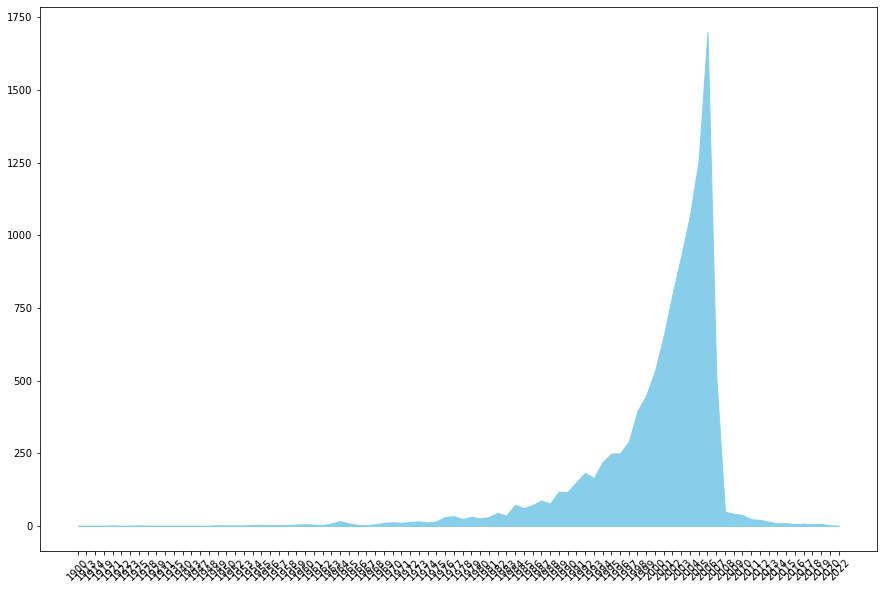

In [81]:
import matplotlib.pyplot as plt

df2 = df.groupby(['year']).agg({"title":'count'}).reset_index()
plt.figure(figsize=(15,10))
plt.fill_between(df2['year'], df2['title'],
                 color="skyblue")
plt.xticks(rotation = 45)
plt.show()

In [75]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,num_pages,year,month,lan
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690.0,27591,9/16/2006,Scholastic Inc.,NaN,2006,9,eng
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167.0,29221,9/1/2004,Scholastic Inc.,NaN,2004,9,eng
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333.0,244,11/1/2003,Scholastic,NaN,2003,11,eng
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435.0,2339585.0,36325,5/1/2004,Scholastic Inc.,NaN,2004,5,eng
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164,9/13/2004,Scholastic,NaN,2004,9,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,DOG MAN 08: FETCH-22,"PILKEY, DAV",2.3,eng-English,NaN,324242.0,23232,12/01/2020,SCHOLASTIC INC.,12,2020,12,eng
11124,"LOST CHRONICLE, THE (BLOOMSBURY POETRY)",POLARBEAR,5.0,eng-English,NaN,789567.0,23245,11/07/2017,BLOOMSBURY UK,457,2017,11,eng
11125,HOW TO MAKE THE BEST COFFEE AT HOME,"HOFFMANN, JAMES",4.6,eng-English,NaN,2345.0,6788,07/03/2018,OCTOPUS PUBLISHING GROUP LTD.,178,2018,07,eng
11126,"PR BOOTCAMP, THE: TAKE YOUR BUSINESS FROM INVI...","MALIN, ANGELICA",3.8,cat-Catalan; Valencian,NaN,12678.0,6789,04/13/2010,"LITTLE, BROWN",210,2010,04,cat


In [82]:
df.groupby(['authors']).agg({"title":'count'}).reset_index().sort_values(by=['title'],ascending=False).head(30)

,authors,title
4750,P.G. Wodehouse,40
5792,Stephen King,40
5476,Rumiko Takahashi,39
4714,Orson Scott Card,35
46,Agatha Christie,33
4993,Piers Anthony,30
5534,Sandra Brown,29
4308,Mercedes Lackey,29
1401,Dick Francis,28
2788,James Patterson,23


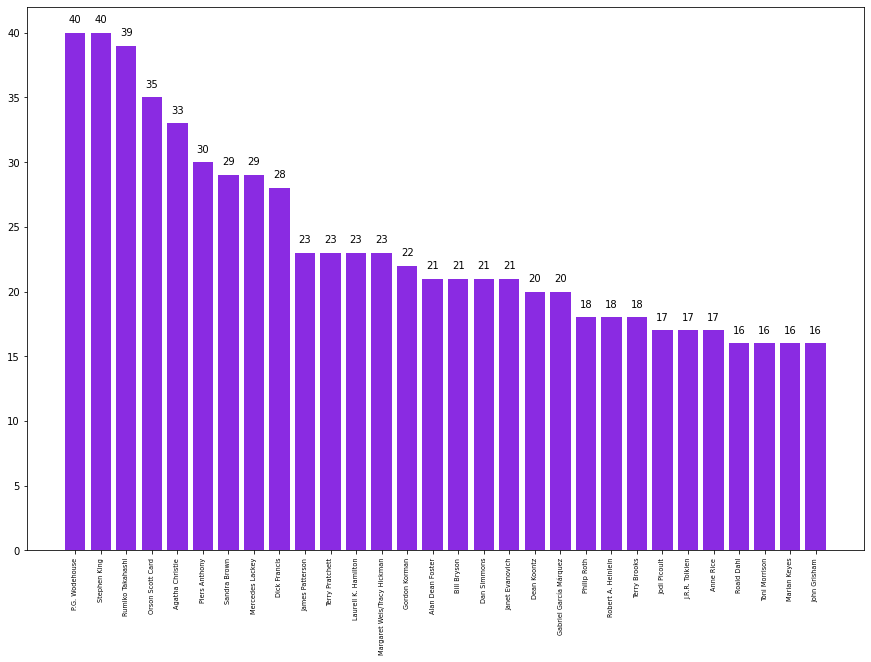

In [83]:
df_bar = df.groupby(['authors']).agg({"title":'count'}).reset_index().sort_values(by=['title'],ascending=False).head(30)
plt.figure(figsize=(15,10))
plt.bar(df_bar.authors , df_bar.title,color="blueviolet")
plt.xticks(rotation = 90,fontsize = 6.5)
for x,y in zip(df_bar.authors,df_bar.title):
    label = "{:.0f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
plt.show()

C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_2444\576364784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lan'] = df['language_code'].apply(lambda x: x.split('-')[0])


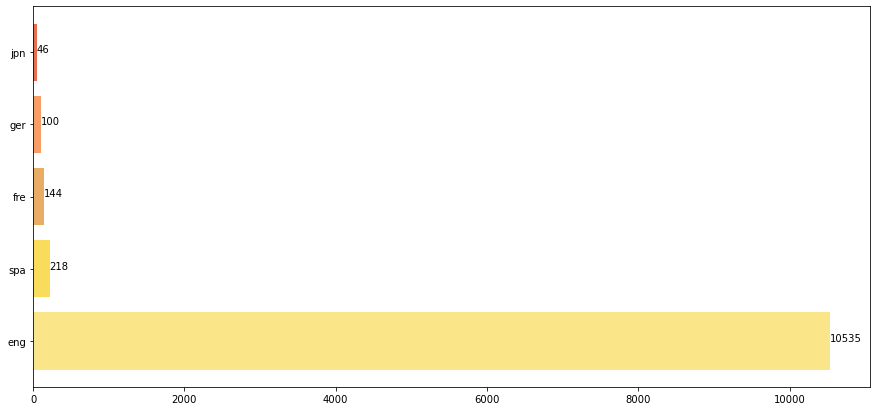

In [40]:
df['lan'] = df['language_code'].apply(lambda x: x.split('-')[0])
df.loc[df.lan == 'en'] = "eng"
df_pie = df.groupby(['lan']).agg({"title":'count'}).reset_index().sort_values(by=['title'],ascending=False).head(5)
plt.figure(figsize=(15,7))
colors = ['#fae588','#f9dc5c','#e8ac65','#f79d65','#e76f51']
plt.barh(df_pie['lan'],df_pie['title'], color=colors)
for i, v in enumerate(df_pie['title']):
    plt.text(v + 0.2, i , str(v), color='black', )
plt.axis()
plt.show()

C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_2444\2563496910.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df2['year'],rotation = 90,fontsize = 6.5)
C:\Users\ThunpitchaSattabun\AppData\Local\Temp\ipykernel_2444\2563496910.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_bar.authors,rotation = 90,fontsize = 6.5)


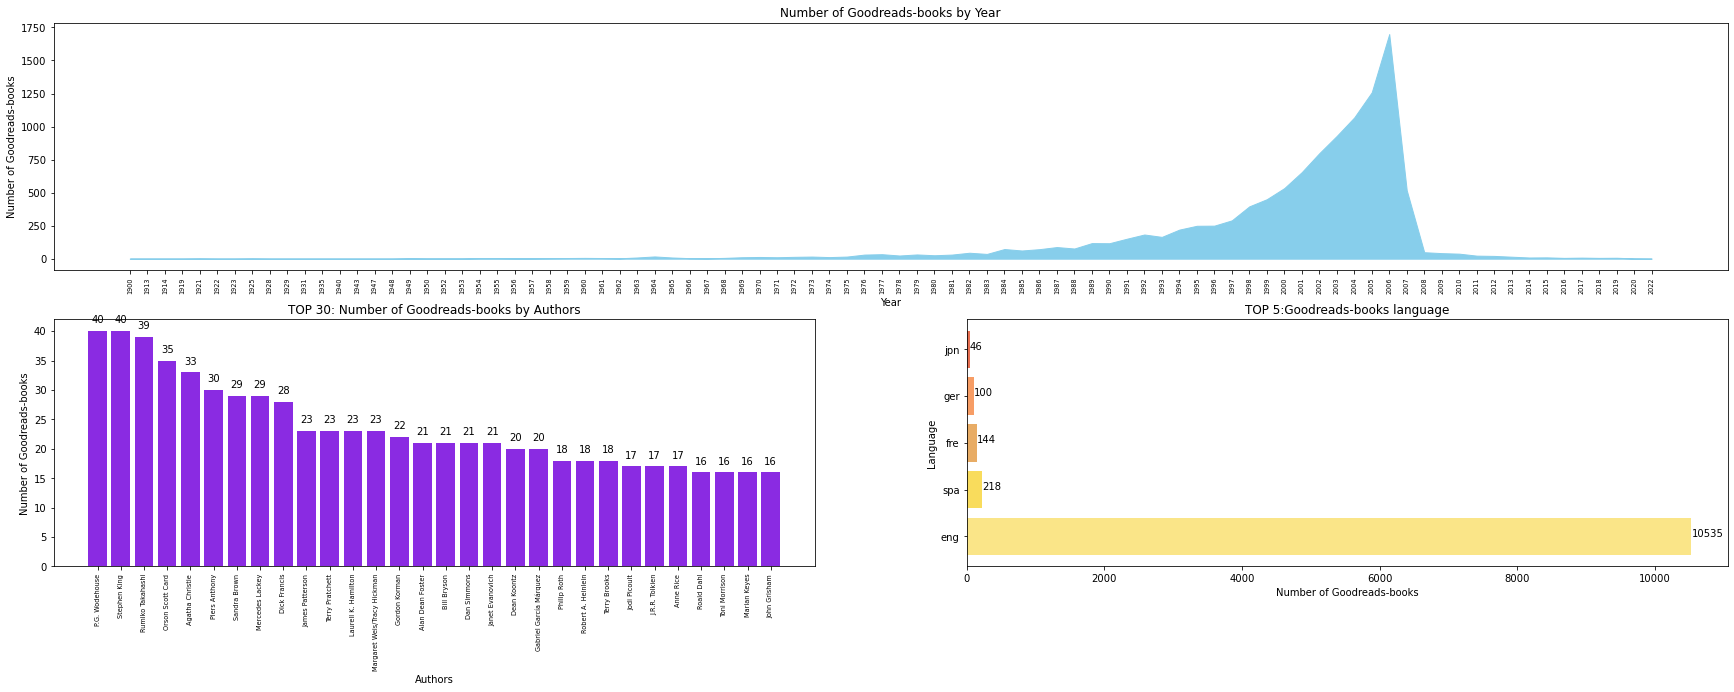

In [94]:
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

ax1.fill_between(df2['year'], df2['title'],
                 color="skyblue")
ax1.set_xticklabels(df2['year'],rotation = 90,fontsize = 6.5)
ax1.set_title("Number of Goodreads-books by Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Goodreads-books")

ax2.bar(df_bar.authors , df_bar.title,color="blueviolet")
ax2.set_xticklabels(df_bar.authors,rotation = 90,fontsize = 6.5)
for x,y in zip(df_bar.authors,df_bar.title):
    label = "{:.0f}".format(y)

    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,8),
                 ha='center')
ax2.set_title("TOP 30: Number of Goodreads-books by Authors")
ax2.set_xlabel("Authors")
ax2.set_ylabel("Number of Goodreads-books")
    
colors = ['#fae588','#f9dc5c','#e8ac65','#f79d65','#e76f51']
ax3.barh(df_pie['lan'],df_pie['title'], color=colors)
for i, v in enumerate(df_pie['title']):
    ax3.text(v + 0.2, i , str(v), color='black', )
ax3.axis()
ax3.set_title("TOP 5:Goodreads-books language")
ax3.set_xlabel("Number of Goodreads-books")
ax3.set_ylabel("Language")

plt.show()